<IPython.core.display.Javascript object>


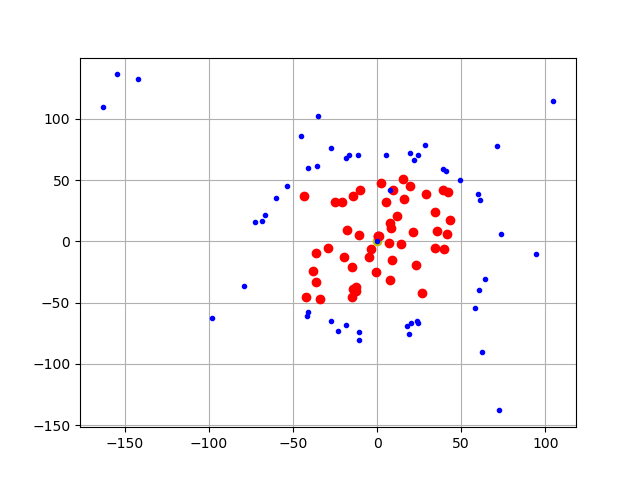

31.60392835700077


In [20]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random as rand
import timeit
start_time = timeit.default_timer()

n = 51
dim = 2

pos = np.zeros((n,dim))
masses = np.zeros(n)
fig, ax = plt.subplots()
ax.grid()

def magnitude(vecs):
    mags = np.sqrt(np.sum((vecs**2), axis=1))
    return mags

def gforce(pos,masses,n,dim):
    assert pos.shape == (n,dim)
    assert masses.shape == (n,)
    g = 10
    force = np.zeros((n,dim))
    for diff in range(1, n-1):
        distances = np.zeros((n,dim))
        pdiff = np.roll(pos, -diff, axis=0)
        p1 = pos
        distances = pdiff - p1
        r = magnitude(distances)
        rhat = distances/r[:,np.newaxis]
        fmag = g * masses * np.roll(masses,-diff) / r**2
        fvec = -fmag[:,np.newaxis] * rhat
        force += fvec
    return force

def initialize_galaxy(pos,masses,n,dim):
    star_force = np.zeros(n)
    mo_vec = np.zeros((n,dim))
    masses[0], masses[1:] = 1000, 0.1
    pos[0][0], pos[0][1] = 0.00001, 0.00001
    ax.plot(0,0,'yo')
    for i in range(1,n):
        pos[i][0], pos[i][1] = rand.uniform(-n,n), rand.uniform(-n,n)
        mo_vec[i][0], mo_vec[i][1] = -pos[i][1], pos[i][0]
        ax.plot(pos[i][0],pos[i][1],'ro')
    pos_mag = magnitude(pos)
    star_force = magnitude(gforce(pos,masses,n,dim))
    m = ((mo_vec * np.sqrt(star_force[:,np.newaxis]*pos_mag[:,np.newaxis]/masses[:,np.newaxis]))/pos_mag[:,np.newaxis])*masses[:,np.newaxis]
    f_vec = np.zeros((n,dim))
    return pos, masses, mo_vec, m, f_vec

def update(pos,masses,mo_vec,m,f_vec,n,dim):
    f_vec = np.zeros((n,dim))
    dt = 0.0001
    f_vec += gforce(pos, masses, n, dim)
    m += f_vec * dt
    pos += m/masses[:,np.newaxis] *dt
    return m,pos

def plot(pos):
    for i in range(0,n):
        ax.plot(pos[i][0],pos[i][1],'b.')
        
a = 0
pos,masses,mo_vec, m, f_vec = initialize_galaxy(pos,masses,n,dim)
while a <= 25000:
    a += 1
    m,pos = update(pos,masses,mo_vec,m,f_vec,n,dim)
plot(pos)
fig.show()

elapsed = timeit.default_timer() - start_time
print(elapsed)